In [4]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=32,
                                                    stratify=y)

In [9]:
# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
# Random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8051948051948052

In [12]:
# ConfusionMatrixDisplay...

In [13]:
# tp/(tp + fn)
51/81

0.6296296296296297

In [17]:
print(rf.feature_importances_, X.columns)

[0.08267844 0.25043982 0.09926104 0.07052449 0.07477923 0.15471635
 0.11956925 0.14803139] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


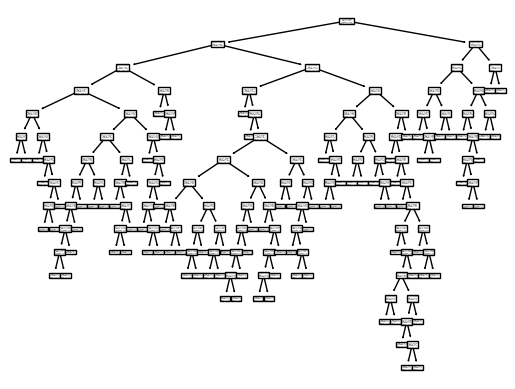

In [18]:
import matplotlib.pyplot as plt
tree_5 = rf.estimators_[4]
tree.plot_tree(tree_5)
plt.savefig('rf_tree.svg')

In [19]:
# look at the documentation for random forest to understand what else is available
# to improve the model

# can increase the estimators, but not too much

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [22]:
# ConfusionMatrixDisplay...

In [23]:
54/(27+54)

0.6666666666666666

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = receiving operating characteristic curve
# ROC curves summarize the trade-off between true positives
# And false positives. They are most approprite for
# Balanced datasets. Can be overly optimistic for severely
# imbalanced classification problems.

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# higher AUC shows a better model typically
auc

0.7599999999999999

In [26]:
# plt...